# Kaggle Titanic Data Science Solution

This notebook will walk you through how I solved the infamous Titanic Kaggle dataset.
There are many different ways to solve this problem. Different ways to build new features, different algorithms to use and such. Take it with a grain of salt.

## Workflow steps
1) What is the question you are solving <br>
2) Get training/test data <br>
3) Prepare, cleanse, maintain data <br>
4) Analyze, identify pattern, feature building, explore data <br>
5) Visualize data <br>
6) Reporting, presenting, validating final solution <br>

My workflow is outlined as above. Although, visualizing may come earlier than expected as it will help us in data analysis. I'll take a step by step approach while explaining the reasoning behind my decisions and any assumptions I make of the data set.

### 1) The Question
<b>This is taken directly from Kaggle.</b>
<br>
* The sinking of the Titanic is one of the most infamous shipwrecks in history.
<br>
* On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
<br>
* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
<br>
* In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 2) Training/Test Data
Let's import some libraries that we are going to need. We will import more libraries later on as we need.<br>
Store the training/test data given from Kaggle into appropriate variables

In [767]:
#data analysis
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [768]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Let's see how our training/test data look like.

In [769]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [770]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [771]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [772]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3) Preparing Data
Now that we have seen what the data looks like, we can start our analysis.<br>
Let's start by looking at the following. <br>
* Columns and the associated value. i.e) numerical, string, categorical, discrete, continuous
* Are there any null/empty values? Even values that could be an error.
* Do we need all columns to predict survival rate?
* Distribution of numerical values across sample

<b> - Let's take a look at the columns and their values. </b> <br><br>
<b> PassengerId </b>: integers <br>
<b>Survived</b>: integers, categorical<br>
<b>Pclass</b>: integers, categorical<br>
<b>Name</b>: string<br>
<b>Sex</b>: string, categorical<br>
<b>Age</b>: float, discrete<br>
<b>SibSp</b>: integers, discrete<br>
<b>Parch</b>: integers, discrete<br>
<b>Ticket</b>: string<br>
<b>Fare</b>: float, continuous <br>
<b>Cabin</b>: mixed <br>
<b>Embarked</b>: string<br>

<b> - Let's see if there are any columns with null values.


I can achieve this fairly simply by converting dataset into true or false dataset then graphing it.

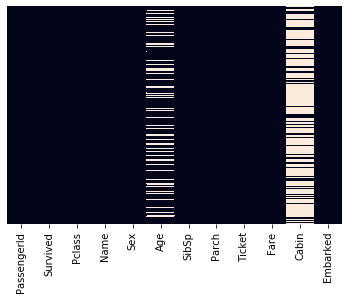

In [773]:
train_truth = train_data.isnull()
sns.heatmap(train_truth, yticklabels=False, cbar=False)

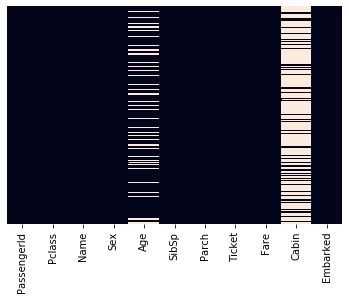

In [774]:
test_truth = test_data.isnull()
sns.heatmap(test_truth, yticklabels=False, cbar=False)

In [775]:
print(train_truth["Age"].value_counts())
print(train_truth["Cabin"].value_counts())

False    714
True     177
Name: Age, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64


As you can see in the graph, "Age" and "Cabin" columns are missing a ton of missing values. <br>
Approximately 20% of "Age" values are missing, and approximately 78% of "Column" values are missing. <br>
While 20% is considerably enough for us to 'estimate' passenger's age, 78% is not. We will go ahead and drop "Cabin" column as this is not enough data. <br> 
Later on, we will estimate the missing age for some passengers. 

In [776]:
train_data = train_data.drop("Cabin", axis=1)
train_data = train_data.drop("Ticket", axis = 1)
test_data = test_data.drop("Cabin", axis=1)
test_data = test_data.drop("Ticket", axis = 1)

Let's take a look at distribution of the numerical/categorical values in our dataset.

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

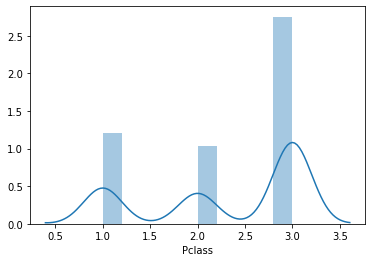

In [777]:
sns.distplot(train_data["Pclass"])
train_data['Pclass'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

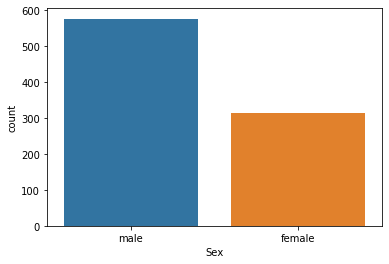

In [778]:
sns.countplot(train_data["Sex"])
train_data['Sex'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

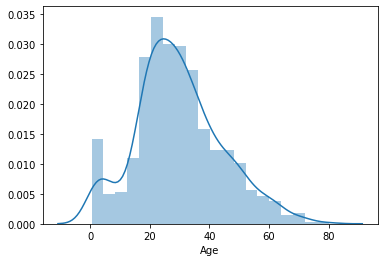

In [779]:
sns.distplot(train_data["Age"])
train_data['Age'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

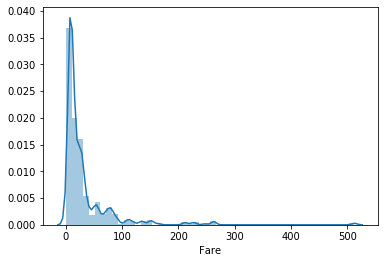

In [780]:
sns.distplot(train_data["Fare"])
train_data['Fare'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

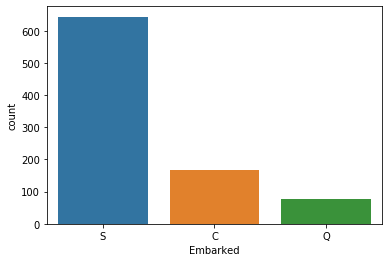

In [781]:
sns.countplot(train_data["Embarked"])
train_data['Embarked'].describe()

From the above graphs, we notice a couple of interesting things about this dataset. <br>
* We have a lot more passengers in 3rd Class. 
* There is almost twice as many males than females on board the Titanic. 
* We have age value from 714 of 891 passenger data. Mean age is around 30.
* Average fare price is 32dollars, with most expensive fare being 512 dollars.
* Most passengers embarked from "S" = Southampton
* We are missing 2 passengers with Embarked information. Let's fill that in with "S"

In [782]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")

### 4) Data Analysis
We've seen generally what our data is. What we need to do now is carry out analysis on our dataset. This means estimating any null values ("Age" column in our case), any feature engineering, and trying to extrapolate meaningful information from our dataset (there will be several assumptions that we need to validate). 

Below is a list of questions I'd like to keep in mind while analyzing the data set.
* Does sex matter in survival rate? i.e) Are men more likely to survive?
* Does age matter in survival rate? i.e) Are young people more likely to survive?
* Does passenger class matter?
* What about number of siblings or parents/spouses?
* What about Embarked?
* Does expensive fare cost give you a better survival rate?

I'm going to make some tables to explore correlation between survival rate and individual columns.

In [783]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [784]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [785]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [786]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [787]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Now, let's try to graph a few features to get a deeper understanding of our dataset.

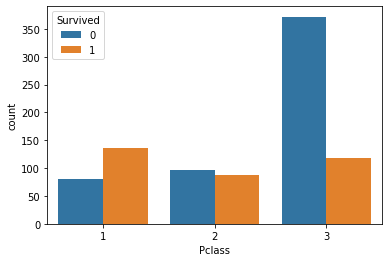

In [788]:
sns.countplot("Pclass", data=train_data, hue="Survived")

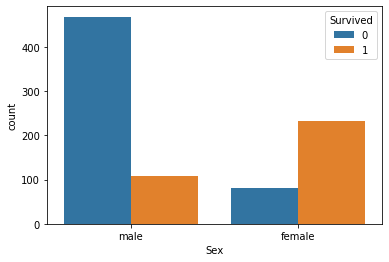

In [789]:
sns.countplot("Sex", data=train_data, hue="Survived")

From our previous survival rate calculation and our above graphs, we can definitely see that Pclass and Sex are correlated to survival rate. <br>
Hence, let us take Pclass and Sex in our model training.

For the purpose of model training and convenience, we should convert "Sex" columns to categorical numeric values. i.e) Female -> 0, Male -> 1

In [790]:
train_data["Sex"] = train_data["Sex"].map({"female":0, "male": 1}).astype(int)
test_data["Sex"] = test_data["Sex"].map({"female":0, "male": 1}).astype(int)

Let's take a look at Embarked feature

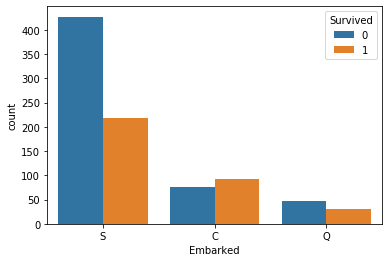

In [791]:
sns.countplot("Embarked", data=train_data, hue="Survived")

Among the 3 embarked categories, "S" had the highest death toll, and "C" had the highest survival rate. <br>
We should take Embarked in our model training. <br>
Let's assign numeric values to Embarked. 

In [792]:
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)
test_data["Embarked"] = test_data["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

Now I want to check if paying higher fare will increase your survival rate. <br>
We've already seen what the distribution of fare is. It basically looks like a somewhat normal distribution that is skewed greatly to the right. <br>
I am going to translate this continuous numerical data into numerical categorical values based on its quartiles. <br>
This will actually make it easier for us to see whether or not the top 25% paying passengers had better survival rate or not.

In [793]:
train_data["Fare"].describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [794]:
def fare_band(num):
    """
    num is integer.
    This will identify fare amound and categorize appropriately.
    """
    if num <= 7.9104:
        return 0
    elif 7.9104 < num and num <= 14.4542:
        return 1
    elif 14.4542 < num and num <= 31.00:
        return 2
    elif 31.00 <= num:
        return 3
train_data["Fare_band"] = train_data["Fare"].apply(fare_band)


Since test set is missing a single Fare value, we can fill that in using the most frequent fare value. Then we can use fare_band function to classify.

In [795]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data["Fare_band"] = test_data["Fare"].apply(fare_band)

I've created a new column "Fare_band" that will assign each fare a categorical values [0, 1, 2, 3] based on their quartiles.<br>
Now we can see if higher paying fare means higher survival rate.

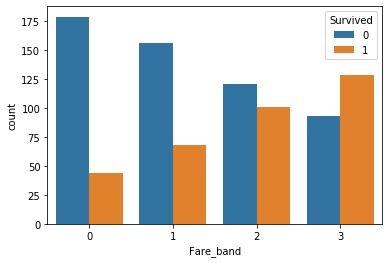

In [796]:
sns.countplot("Fare_band", hue="Survived", data=train_data)

In [797]:
train_data[['Fare_band', 'Survived']].groupby(['Fare_band'], as_index=False).mean()

,Fare_band,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


From the above calculation and graph, we can clearly see that as you pay more fare, survival rate increases gradually. <br>
We should include Fare in our model training as well.

A brief summary of what we did so far. 
* A few survival rate calculations
* A few graphs to support our assumptions
* Divded Fare into Fare_band groups
* We have decided to take Embarked, Sex, Pclass, Fare_band in our model training so far.
* We still have to decide what we need to do for Age, Name, SibSp, Parch, Ticket. 


Let's take a look at Age feature now.

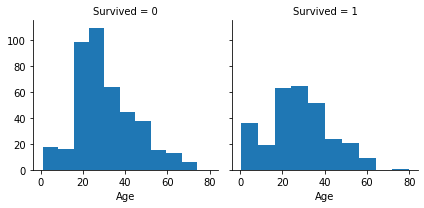

In [798]:
g = sns.FacetGrid(data=train_data, col="Survived")
g = g.map(plt.hist, "Age")

A couple of observations can be made about this feature.
* More people from age 20 ~ 30 did not survive than any other age group.
* More infants, toddlers were saved i.e) age 0~10
* Oldest passenger survived

We should take Age in our model training. <br>
In order to do so, we must fill in null values in the Age column. <br>
There's several ways to 'estimate' age for passengers. <br>
I will be dividing passengers into 6 groups based on their Pclass (x3) and Sex (x2), then taking the mean of each group.

In [799]:
train_data.groupby(["Pclass", "Sex"]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Fare  Embarked  \
Pclass Sex                                                                   
1      0             94        94    94   85     94     94    94        94   
       1            122       122   122  101    122    122   122       122   
2      0             76        76    76   74     76     76    76        76   
       1            108       108   108   99    108    108   108       108   
3      0            144       144   144  102    144    144   144       144   
       1            347       347   347  253    347    347   347       347   

            Fare_band  
Pclass Sex             
1      0           94  
       1          122  
2      0           76  
       1          108  
3      0          144  
       1          347

In [800]:
train_data.groupby(["Pclass", "Sex"]).mean()["Age"]

Pclass  Sex
1       0      34.611765
        1      41.281386
2       0      28.722973
        1      30.740707
3       0      21.750000
        1      26.507589
Name: Age, dtype: float64

In [801]:
def estimate_age(df):
    """Helper function used to estimate missing age of a passenger.
    row: dataframe with columns Age, Sex and Pclass
    """
    Age = df[0]
    Sex = df[1]
    Pclass = df[2]
    #
    if pd.isnull(Age):
        if Sex == 0:
            if Pclass == 1:
                return 34.61
            elif Pclass == 2:
                return 28.72
            elif Pclass == 3:
                return 21.75
        elif Sex == 1:
            if Pclass == 1:
                return 41.28
            elif Pclass == 2:
                return 30.74
            elif Pclass == 3:
                return 26.50
    else:
        return df["Age"]

In [802]:
train_data["Age"] = train_data[["Age", "Sex", "Pclass"]].apply(estimate_age, axis=1)
test_data["Age"] = test_data[["Age", "Sex", "Pclass"]].apply(estimate_age, axis=1)

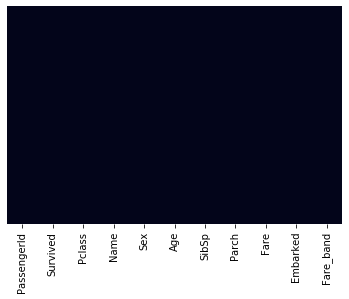

In [803]:
train_truth = train_data.isnull()
sns.heatmap(train_truth, yticklabels=False, cbar=False)

We have estimated and filled the missing age values for all passengers. <br>
If you see the above heatmap, we have no missing values in our dataset anymore. <br>
Now that we have filled in null values for age, we can determine if age matters in survival rate. <br>
Just like what we've done with Fare, we can split age into different age groups.<br>
Let's split age using quartiles.

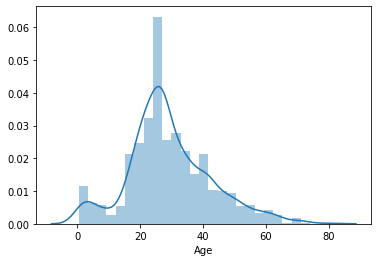

In [804]:
sns.distplot(train_data["Age"])

In [805]:
train_data["Age"].describe()

count    891.000000
mean      29.317778
std       13.281236
min        0.420000
25%       21.750000
50%       26.500000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [806]:
def ageband(num):
    """helper function.
    Num: integer
    Returns what category num age is in.
    0 is [0, 21.75)
    1 is [21.75, 26.50)
    2 is [26.50, 36)
    3 is [36, 80]
    """
    if num < 21.75:
        return 0
    elif 21.75 <= num < 26.50:
        return 1
    elif 26.50 <= num < 36:
        return 2
    elif num >= 36:
        return 3

In [807]:
train_data["Age_band"] = train_data["Age"].apply(ageband)
test_data["Age_band"] = test_data["Age"].apply(ageband)

In [808]:
train_data["Age_band"]

0      1
1      3
2      1
3      2
4      2
      ..
886    2
887    0
888    1
889    1
890    2
Name: Age_band, Length: 891, dtype: int64

In [809]:
train_data[['Age_band', 'Survived']].groupby(['Age_band'], as_index=False).mean()

,Age_band,Survived
0,0,0.426471
1,1,0.433121
2,2,0.339041
3,3,0.369748


We can see that from the above grouping and survivability calculation, younger people have better survivability rate than older people. <br>
Let's use Age_Fare in our model training.

In [810]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_band,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,1,2


In [811]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_band,Age_band
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,2,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,2,1,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,1,1


Now, let's consider the columns SibSp and Parch <br>
SibSp is the number of siblings or spouses you have. <br>
Parch is the number of parents or children you have. <br>
One feature engineering we can do from these columns is to see whether the particular passenger was alone or with any family member. <br>
Such that when SibSp + Parch = 0 this means the passenger was onboard alone. <br>
Similarly, when SibSp + Parch > 0 means the passenger was with at least 1 family member. <br>
Let's make a new column "Alone"

In [812]:
def is_alone(df):
    """helper function to determine whether a particular passenger was onboard alone.
    df = dataframe with two columns
    df[0] = SibSp
    df[1] = Parch
    returns 1 if passenger is alone, 0 otherwise.
    """
    sib = df["SibSp"]
    par = df["Parch"]
    if sib + par == 0:
        return 1
    else:
        return 0

In [813]:
train_data["Alone"] = train_data[["SibSp", "Parch"]].apply(is_alone, axis=1)
test_data["Alone"] = test_data[["SibSp", "Parch"]].apply(is_alone, axis=1)

In [814]:
train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean() 

,Alone,Survived
0,0,0.505650
1,1,0.303538


Our calculation tell us that if you were alone onboard the Titanic, you have less chance of survival than those with at least 1 family member onboard. <br>
Quiet the unusual observation, as I thought loneness would increase your survival chance.

Now our dataset looks like this

In [815]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_band,Age_band,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,3,3,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,1,2,1


Let's get rid of the columns that we are not going to use in our model training.

In [816]:
train_data = train_data.drop(["Age", "Fare", "SibSp", "Parch", "Name", "PassengerId"], axis = 1)
test_data = test_data.drop(["Age", "Fare", "SibSp", "Parch", "Name", "PassengerId"], axis = 1)

In [817]:
train_data

,Survived,Pclass,Sex,Embarked,Fare_band,Age_band,Alone
0,0,3,1,0,0,1,0
1,1,1,0,1,3,3,0
2,1,3,0,0,1,1,1
3,1,1,0,0,3,2,0
4,0,3,1,0,1,2,1
...,...,...,...,...,...,...,...
886,0,2,1,0,1,2,1
887,1,1,0,0,2,0,1
888,0,3,0,0,2,1,0
889,1,1,1,1,2,1,1


In [818]:
test_data

,Pclass,Sex,Embarked,Fare_band,Age_band,Alone
0,3,1,2,0,2,1
1,3,0,0,0,3,0
2,2,1,2,1,3,1
3,3,1,0,1,2,1
4,3,0,0,1,1,0
...,...,...,...,...,...,...
413,3,1,0,1,2,1
414,1,0,1,3,3,1
415,3,1,0,0,3,1
416,3,1,0,1,2,1


Now, we are done with data wrangling. <br>
What we have left to do is build our model, train the model, then test our model.

### 5) Model Building
We can use several machine learning algorithms to build this model. <br>
Our model is a classification or regression problem. This is also supervised learning as our training set comes with a labeled data set. Let's go ahead and import some useful libraries for these
* Logistic Regression
* Decision Tree
* KNN
* Support Vector Machine
* Naive Bayes Classifier <br>


In [821]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [830]:
X_train = train_data.drop("Survived", axis =1)
Y_train = train_data["Survived"]
X_test = test_data
#We do not have Y_test because that is what we are trying to predict.

**Logistic Regression**

In [836]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
Pred_log = logmodel.predict(X_test)

**Decision Tree**

In [837]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, Y_train)
Pred_tree = Tree.predict(X_test)

**KNN**

In [838]:
K_neighbor = KNeighborsClassifier()
K_neighbor.fit(X_train, Y_train)
Pred_KNN = K_neighbor.predict(X_test)

**Support Vector Machine**

In [839]:
svm = SVC()
svm.fit(X_train, Y_train)
Pred_svm = svm.predict(X_test)

**Naive Bayes Classifier**

In [840]:
nbc = GaussianNB()
nbc.fit(X_train, Y_train)
Pred_nbc = nbc.predict(X_test)

Let's take a look at accuracy score to determine which model is better.

In [851]:
log_score = logmodel.score(X_train, Y_train)
Tree_score = Tree.score(X_train, Y_train)
KNN_score = K_neighbor.score(X_train, Y_train)
svm_score = svm.score(X_train, Y_train)
nbc_score = nbc.score(X_train, Y_train)

In [864]:
data = {"Score" : [log_score, Tree_score, KNN_score, svm_score, nbc_score]}
score_df = pd.DataFrame(data, index=["Logistic Regression", "Decision Tree", "KNN", "SVM", "Naive Bayes Classifier"])
score_df

,Score
Logistic Regression,0.796857
Decision Tree,0.860831
KNN,0.832772
SVM,0.813692
Naive Bayes Classifier,0.773288


In [865]:
test_data_copy = pd.read_csv("test.csv")

Here we see that Decision Tree algorithm outputs the highet score. Our submission should be based on Decision Tree model.

In [866]:
submission = pd.DataFrame({"PassengerId": test_data_copy["PassengerId"], "Survived": Pred_tree})

In [869]:
submission.to_csv("D:\Harold\Data Science Project\Titanic\Submission.csv")

## End
This concludes my titanic survival prediction.
Many thanks to youtube videos on data science projects and kaggle for the dataset. <br>
Huge shoutout to Manav Sehgal for inspirations and various data science techniques. <br>
Solution provided by **Harold Hyun Woo Lee**
Thanks for reading!